## Data Science Module 1 Final Project: <br>Predicting the Sale Price of Houses in King County

Student Names: Natasha Kacoroski and David Kaspar 
Student Pace: Full time 
Scheduled Project Review Date/Time: Unknown 
Instructor Names: Miles Erickson and Greg Damico 
Blog Post URL: Unknown

Before doing anything with the data, we need to import the python libraries that we will be using to manipulate the data (explain what libraries and why) and import the data into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn as sk
from scipy.stats import zscore
%matplotlib inline

kch_df = pd.read_csv('kc_house_data.csv')
df = kch_df.copy()

## Step 1: Clean King County Housing Data

### Initial data observations

The first step of data cleaning is to take an initial look at the dataset and see what it looks like, using transpose allows us to see all the columns easily.

In [2]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


Looking at the head of the dataframe, we can see that the columns are the appropriate data labels not the first entry. To confirm and check the column information we imported the .md file on column information.

In [3]:
from IPython.display import display, Markdown

with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


Looking at the column information, most columns descriptions confirm our initial understanding of the column name. We learn that view means whether the house has been viewed (assumed to be potential buyers), and sqft_living15 and sqft_lot15 refers to the square footage of interior housing living space and land lots for nearest 15 neighbors, respectively. Also of interest is the grade given to housing unit based on King County grading system. We looked up the King County grading system here: <br> https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r <br>
to understand the grading system.

BUILDING GRADE <br>
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish     work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13  = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

After getting a better understanding of each column, we moved to looking at values within each column. We also had the initial thought of moving the id column to be the primary key if there are no duplicates. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The shape of our data is 21,587 entries and 21 columns, with data types of float64(8), int64(11), and object(2). There are null values in waterfront, view, and yr_renovated. Columns to consider changing data types are: id from int64 to a object (value is independent of magnitude), date to a timestamp (makes it easier to manipulate), sqft_basement from object to int64 (value is dependent on magnitude), yr_built is int64 while yr_renovated is float64 is odd - needs further investigation, and zipcode from int64 to object (value is independent of magnitude). It would also be useful to know which columns contain continuous or discrete data because that will influence how we deal with null values and will be a factor in determining one-hot encoding.

### Addressing the null values and if values are continuous or discrete

In [5]:
def null_percentage_and_data_continuity(df):
    """Returns percentage of null values in data column if nulls exist 
    and whether data is likely continuous or discrete."""
    display_df = df.head(1).applymap(type)
    percent_nan = {}
    disc_or_cont = {}
    for i, col in enumerate(df):
        col_percent_nan = round(100*df[col].isna().sum() / len(df[col]), 2)
        percent_nan[col] = [col_percent_nan]
        if df[col].nunique() < 100:
            disc_or_cont[col] = ['disc']
        else:
            disc_or_cont[col] = ['cont']
    percent_nan_df = pd.DataFrame.from_dict(percent_nan, orient='columns')
    disc_or_cont_df = pd.DataFrame.from_dict(disc_or_cont, orient='columns')
    final = pd.concat([display_df, percent_nan_df, disc_or_cont_df]).T
    final.columns = ['dtype', 'percent null', 'disc or cont']
    return final

null_percentage_and_data_continuity(df)

,dtype,percent null,disc or cont
id,<class 'int'>,0,cont
date,<class 'str'>,0,cont
price,<class 'float'>,0,cont
bedrooms,<class 'int'>,0,disc
bathrooms,<class 'float'>,0,disc
sqft_living,<class 'int'>,0,cont
sqft_lot,<class 'int'>,0,cont
floors,<class 'float'>,0,disc
waterfront,<class 'float'>,11,disc
view,<class 'float'>,0.29,disc


Starting with waterfront values with around 11% of discrete data. Let's check the unique values.

In [6]:
print(df.waterfront.unique())
print(df.waterfront.value_counts())
for count in list(df.waterfront.value_counts()):
    print(count / sum(list(df.waterfront.value_counts()))*100)

[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64
99.24041413037823
0.7595858696217679


Waterfront is binary, where 0 is no waterfront view and 1 means that there is a waterfront view. Null values are if waterfront view is unknown. Since the value count of 0 is significantly more common (99.2%), we decided to replace all null values with 0.

Moving onto view. The description for view is "has been viewed." We picture this to mean whether at the time that the data for this entry was collected, TEST!!!!

## Step 2: Exploratory Data Analysis of King County Housing Data

## Step 3: Modeling of King County Housing Data with Multivariate Linear Regression

In [7]:
def inspect_df(df=df):
    # display(df.describe().T)
    display(pd.concat([df.head(1).applymap(type), df.head(2)]).T)
    for i, col in enumerate(df):
        print('-------------------------------------')
        print(f'           {col} @ {i}')
        
        percent_nan = round(df[col].isna().sum() / len(df[col]), 4)
        if percent_nan > 0:
            print(f'Uh oh, {col} has {percent_nan} missing values')
        else:
            print('Good, no values missing.')
        if df[col].nunique() < 100:
            print(f"{col} seems to be discrete with {df[col].nunique()} unique values.")
            try:
                plt.figure(figsize=(8,8))
                sns.catplot(x=col, y=df['price'], data=df)
                plt.show()
            except Exception as e: 
                print(e)
                plt.show()
        else:
            print(f"{col} seems to be continuous.")
            plt.figure(figsize=(8,8))
            sns.scatterplot(x=col, y=df['price'], data=df, alpha=.3)
            plt.show()
#         except Exception as e: 
#             print(e)


In [8]:
# give every a row a meaninful number for 'yr_renovated': replace 0 or NaN with 'yr_built' instead
df.loc[df['yr_renovated'].isna(), 'yr_renovated'] = df.loc[df['yr_renovated'].isna(), 'yr_built']
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df.loc[df['yr_renovated'] == 0, 'yr_built']
df[['yr_built','yr_renovated']].loc[df.yr_built != df.yr_renovated].shape

(744, 2)

In [9]:
# Same process as above for 'waterfront' and 'view', we replaced with the MODE of each series (0 in both cases)
# since they are categorical and the MEAN wouldn't make sense
df.loc[df.waterfront.isna(), 'waterfront'] = df.waterfront.mode()
df.loc[df.view.isna(), 'view'] = df.view.mode()

,0,0,1
id,<class 'int'>,7129300520,6414100192
date,<class 'str'>,10/13/2014,12/9/2014
price,<class 'float'>,221900,538000
bedrooms,<class 'int'>,3,3
bathrooms,<class 'float'>,1,2.25
sqft_living,<class 'int'>,1180,2570
sqft_lot,<class 'int'>,5650,7242
floors,<class 'float'>,1,2
waterfront,<class 'float'>,0,0
view,<class 'float'>,0,0


-------------------------------------
           id @ 0
Good, no values missing.
id seems to be continuous.


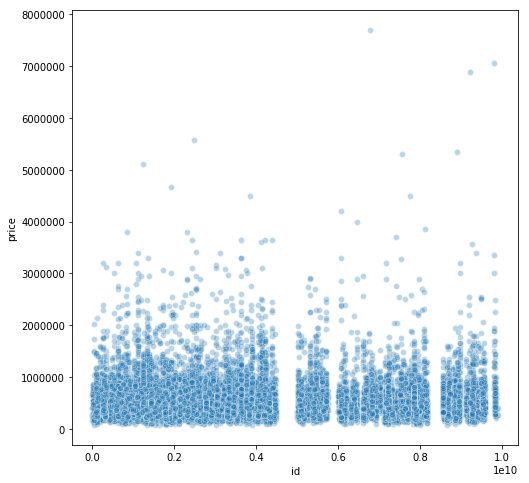

-------------------------------------
           date @ 1
Good, no values missing.
date seems to be continuous.


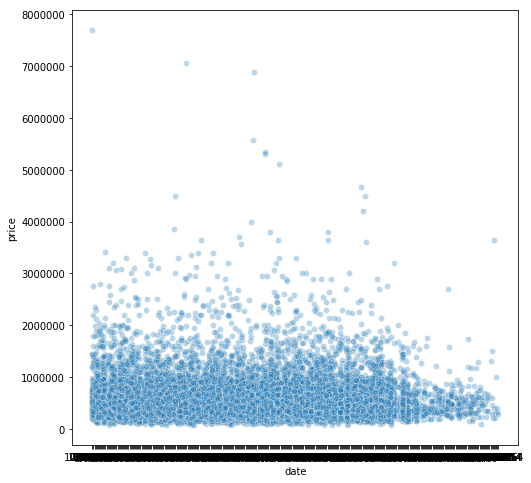

-------------------------------------
           price @ 2
Good, no values missing.
price seems to be continuous.


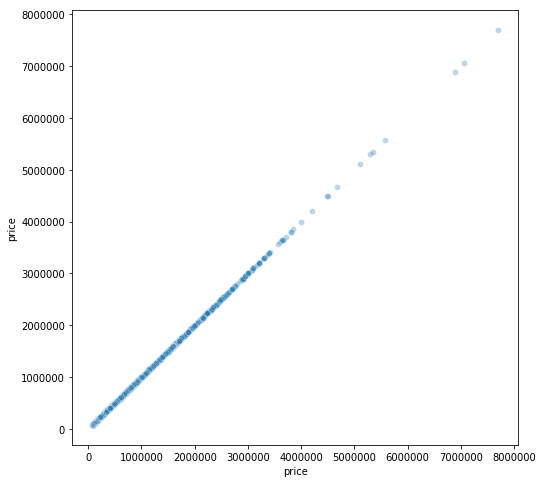

-------------------------------------
           bedrooms @ 3
Good, no values missing.
bedrooms seems to be discrete with 12 unique values.
invalid type comparison


/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<Figure size 576x576 with 0 Axes>

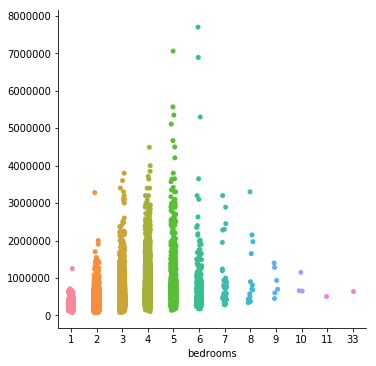

-------------------------------------
           bathrooms @ 4
Good, no values missing.
bathrooms seems to be discrete with 29 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

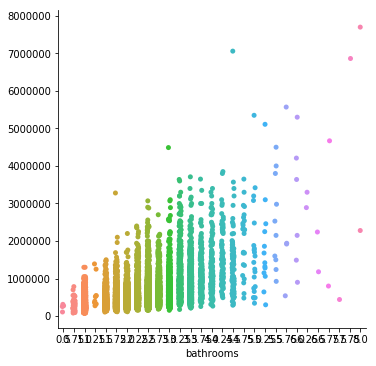

-------------------------------------
           sqft_living @ 5
Good, no values missing.
sqft_living seems to be continuous.


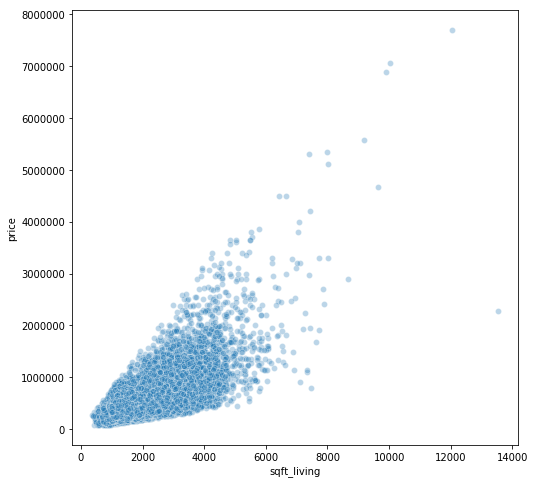

-------------------------------------
           sqft_lot @ 6
Good, no values missing.
sqft_lot seems to be continuous.


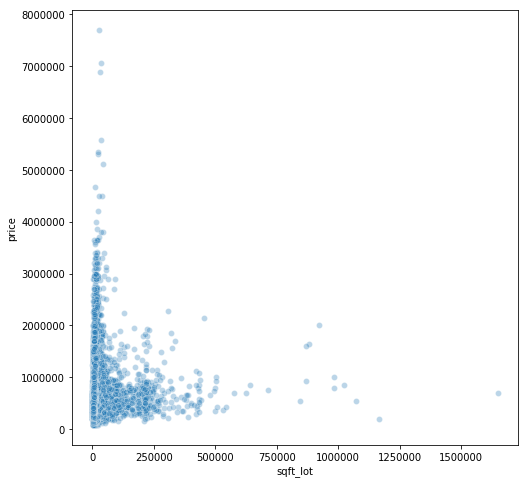

-------------------------------------
           floors @ 7
Good, no values missing.
floors seems to be discrete with 6 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

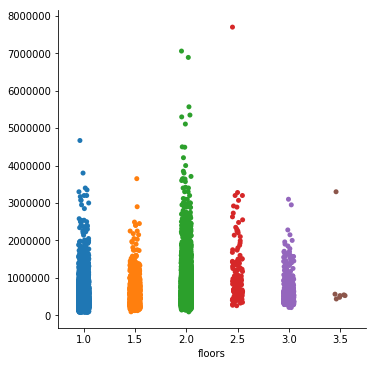

-------------------------------------
           waterfront @ 8
Uh oh, waterfront has 0.11 missing values
waterfront seems to be discrete with 2 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

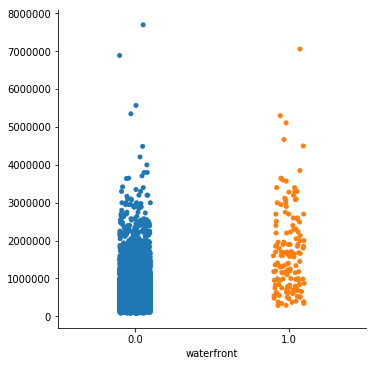

-------------------------------------
           view @ 9
Uh oh, view has 0.0029 missing values
view seems to be discrete with 5 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

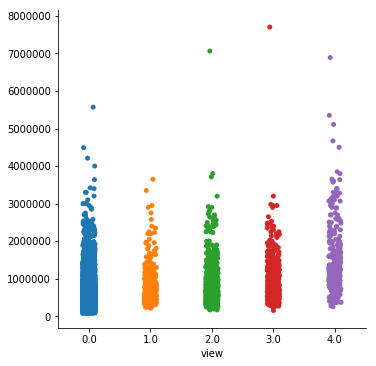

-------------------------------------
           condition @ 10
Good, no values missing.
condition seems to be discrete with 5 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

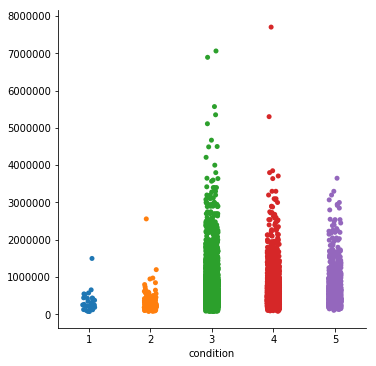

-------------------------------------
           grade @ 11
Good, no values missing.
grade seems to be discrete with 11 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

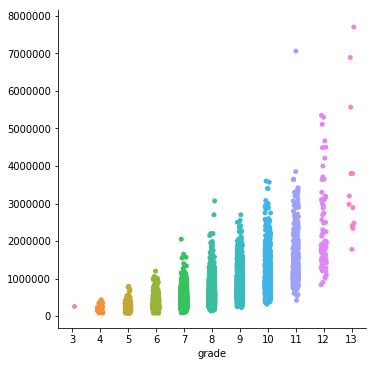

-------------------------------------
           sqft_above @ 12
Good, no values missing.
sqft_above seems to be continuous.


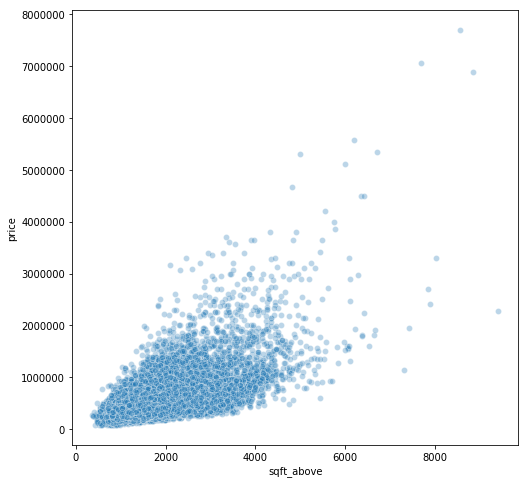

-------------------------------------
           sqft_basement @ 13
Good, no values missing.
sqft_basement seems to be continuous.


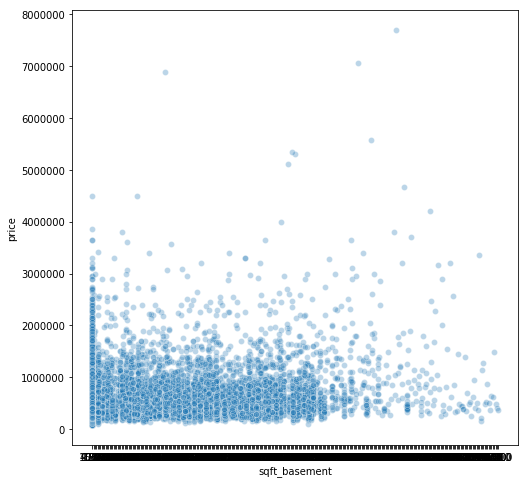

-------------------------------------
           yr_built @ 14
Good, no values missing.
yr_built seems to be continuous.


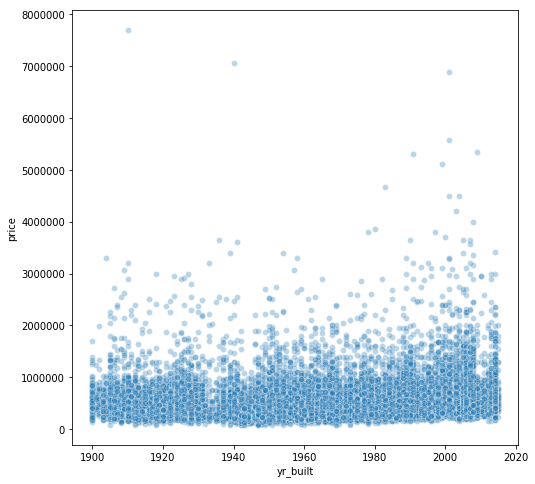

-------------------------------------
           yr_renovated @ 15
Good, no values missing.
yr_renovated seems to be continuous.


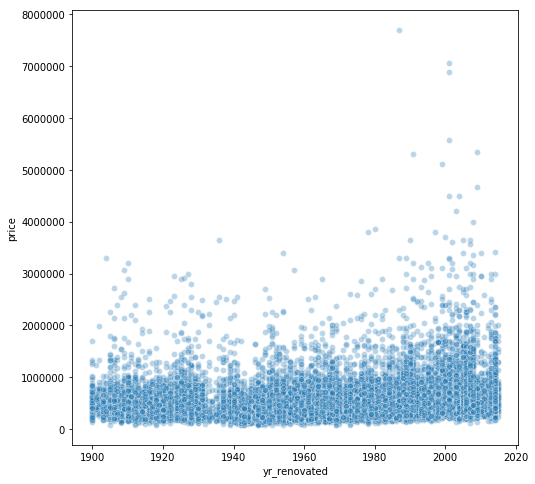

-------------------------------------
           zipcode @ 16
Good, no values missing.
zipcode seems to be discrete with 70 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

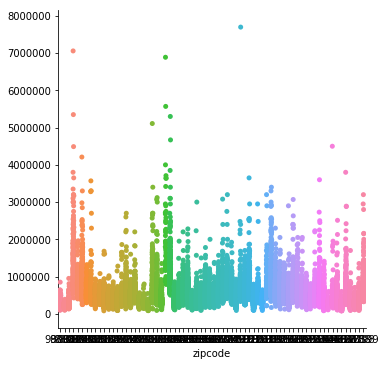

-------------------------------------
           lat @ 17
Good, no values missing.
lat seems to be continuous.


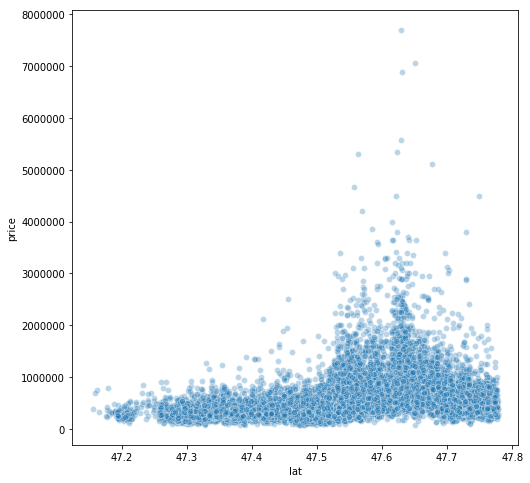

-------------------------------------
           long @ 18
Good, no values missing.
long seems to be continuous.


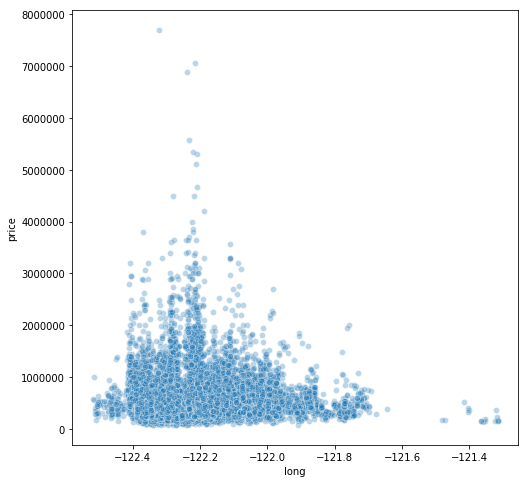

-------------------------------------
           sqft_living15 @ 19
Good, no values missing.
sqft_living15 seems to be continuous.


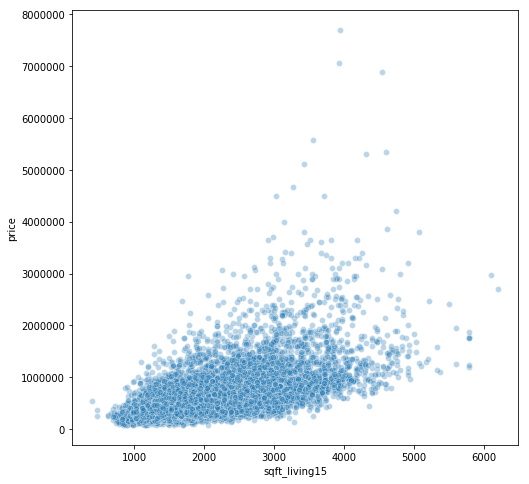

-------------------------------------
           sqft_lot15 @ 20
Good, no values missing.
sqft_lot15 seems to be continuous.


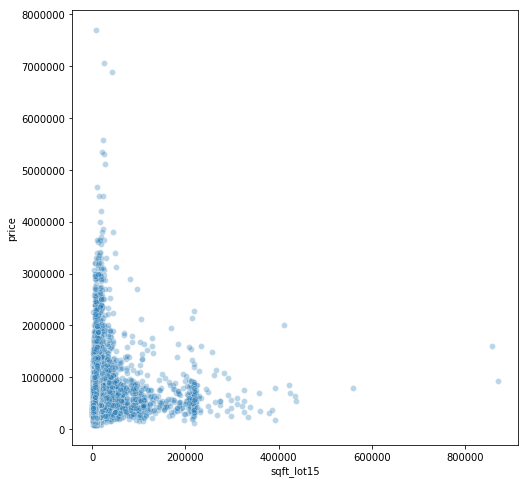

In [10]:
inspect_df()

Score: 0.49276826004407825


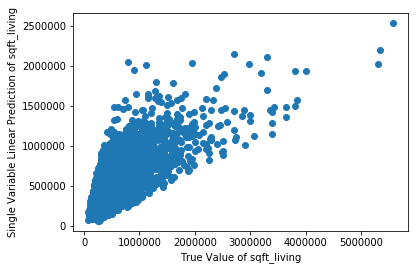

Score: 0.3615018527558119


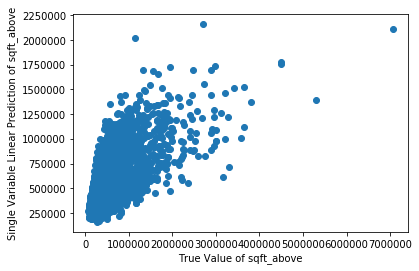

Score: 0.33666499632451863


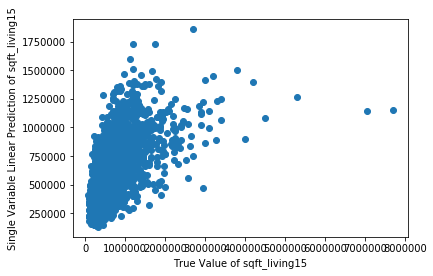

In [14]:
possible_single_var = ['sqft_living', 'sqft_above', 'sqft_living15']
for col in possible_single_var:
    y = df[['price']]
    X = df[[col]]
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    predictions = linreg.predict(X_test)

    plt.scatter(y_test, predictions)
    plt.xlabel(f"True Value of {col}")
    plt.ylabel(f"Single Variable Linear Prediction of {col}")
    print("Score:", model.score(X_test, y_test))
    plt.show()

From our 3 quick single variable linear models, sqft_living yields the highest score, so we'll consider that the baseline, now let's explore using multiple columns together as predictors. Initially, let's just use data that's already usable as numbers (float or int).

In [15]:
explore_df = df.drop(['id', 'price', 'yr_renovated', 'lat', 'long', 'sqft_basement', 'zipcode', 'date'], axis=1)
explore_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,1800,7503


In [16]:
y = df[['price']]
X = explore_df
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel(f"True Values")
plt.ylabel(f"Multi Variable Linear Predictions")
print("Score:", model.score(X_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').